# What is the most optimal skill to learn for Data Analysts?

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Booheymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_india =  df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='India')].copy()
df_DA_india = df_DA_india.dropna(subset='salary_year_avg').explode('job_skills')
df_DA_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,python,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,sql,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,aws,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,azure,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,excel,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777313,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-01-10 05:12:09,False,False,India,year,111202.0,NaN,Poshmark,looker,"{'analyst_tools': ['excel', 'looker', 'powerpo..."
777313,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-01-10 05:12:09,False,False,India,year,111202.0,NaN,Poshmark,powerpoint,"{'analyst_tools': ['excel', 'looker', 'powerpo..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,power bi,"{'analyst_tools': ['power bi', 'tableau']}"
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,tableau,"{'analyst_tools': ['power bi', 'tableau']}"


In [4]:
df_DA_india_skills = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_india_skills = df_DA_india_skills.rename(
    columns={
        'count': 'skill_count',
        'median':'median_salary'
    }
)
DA_job_count = len(df_DA_india)
df_DA_india_skills['skill_percent'] = df_DA_india_skills['skill_count'] / DA_job_count *100
df_DA_india_skills = df_DA_india_skills[df_DA_india_skills['skill_count'] > 0]
df_DA_india_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.0,11.246944
excel,39,98500.0,9.535452
python,36,96050.0,8.801956
tableau,20,108087.5,4.889976
r,18,79200.0,4.400978
...,...,...,...
postgresql,1,165000.0,0.244499
ms access,1,64600.0,0.244499
mysql,1,165000.0,0.244499


In [5]:
skill_limit = 3

df_DA_india_high_demand_skill = df_DA_india_skills[df_DA_india_skills['skill_percent'] > skill_limit]
df_DA_india_high_demand_skill

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.0,11.246944
excel,39,98500.0,9.535452
python,36,96050.0,8.801956
tableau,20,108087.5,4.889976
r,18,79200.0,4.400978
power bi,17,111175.0,4.156479
azure,15,93600.0,3.667482


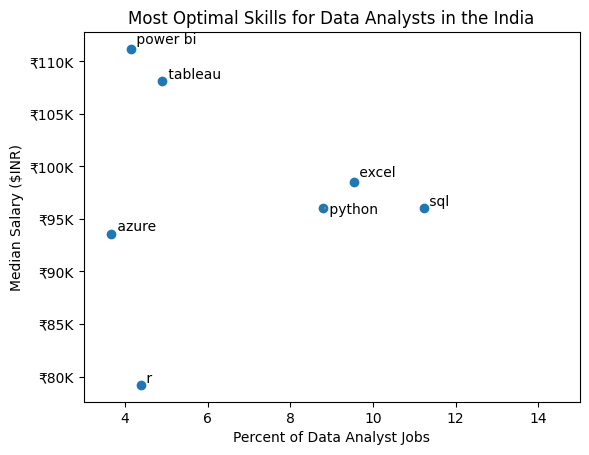

In [10]:
from adjustText import adjust_text

plt.scatter(
    df_DA_india_high_demand_skill['skill_percent'],
    df_DA_india_high_demand_skill['median_salary']   
)
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($INR)') 
plt.xlim(3,15)
plt.title('Most Optimal Skills for Data Analysts in the India')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'₹{int(y/1000)}K'))

texts = []
for i, txt in enumerate(df_DA_india_high_demand_skill.index):
    texts.append(plt.text(df_DA_india_high_demand_skill['skill_percent'].iloc[i], df_DA_india_high_demand_skill['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.show()

## Coloring by Technology

In [82]:
df_technology = df['job_type_skills'].copy().drop_duplicates().dropna()

technology_dict = {}
for rows in df_technology:
    row_dict = ast.literal_eval(rows)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value    
technology_dict

{'analyst_tools': ['power bi',
  'tableau',
  'dax',
  'excel',
  'powerpoint',
  'power bi',
  'excel',
  'qlik',
  'excel',
  'power bi',
  'sap',
  'power bi',
  'excel',
  'excel',
  'looker',
  'tableau',
  'tableau',
  'excel',
  'sap',
  'power bi',
  'excel',
  'word',
  'powerpoint',
  'sas',
  'spss',
  'tableau',
  'excel',
  'power bi',
  'power bi',
  'microstrategy',
  'cognos',
  'sap',
  'excel',
  'tableau',
  'looker',
  'tableau',
  'qlik',
  'power bi',
  'tableau',
  'tableau',
  'power bi',
  'looker',
  'tableau',
  'excel',
  'power bi',
  'word',
  'excel',
  'powerpoint',
  'outlook',
  'tableau',
  'power bi',
  'excel',
  'tableau',
  'power bi',
  'tableau',
  'excel',
  'looker',
  'sap',
  'sas',
  'word',
  'excel',
  'splunk',
  'tableau',
  'qlik',
  'tableau',
  'power bi',
  'tableau',
  'excel',
  'tableau',
  'power bi',
  'excel',
  'word',
  'powerpoint',
  'power bi',
  'tableau',
  'tableau',
  'sap',
  'power bi',
  'qlik',
  'tableau',
  'exc

In [83]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(
    technology_dict.items(), columns=['technology', 'skills']
)
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,power bi
0,analyst_tools,tableau
0,analyst_tools,dax
0,analyst_tools,excel
0,analyst_tools,powerpoint
...,...,...
9,sync,twilio
9,sync,slack
9,sync,zoom
9,sync,unify


In [84]:
df_DA_skills_tech = df_DA_india_skills.merge(
    df_technology,
    left_on='job_skills',
    right_on='skills'
)
df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,46,96050.0,11.246944,programming,sql
1,46,96050.0,11.246944,programming,sql
2,46,96050.0,11.246944,programming,sql
3,46,96050.0,11.246944,programming,sql
4,46,96050.0,11.246944,programming,sql
...,...,...,...,...,...
1172671,1,104500.0,0.244499,sync,zoom
1172672,1,104500.0,0.244499,sync,zoom
1172673,1,104500.0,0.244499,sync,zoom
1172674,1,104500.0,0.244499,sync,zoom


In [85]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]
df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,46,96050.0,11.246944,programming,sql
1,46,96050.0,11.246944,programming,sql
2,46,96050.0,11.246944,programming,sql
3,46,96050.0,11.246944,programming,sql
4,46,96050.0,11.246944,programming,sql
...,...,...,...,...,...
405585,15,93600.0,3.667482,cloud,azure
405586,15,93600.0,3.667482,cloud,azure
405587,15,93600.0,3.667482,cloud,azure
405588,15,93600.0,3.667482,cloud,azure


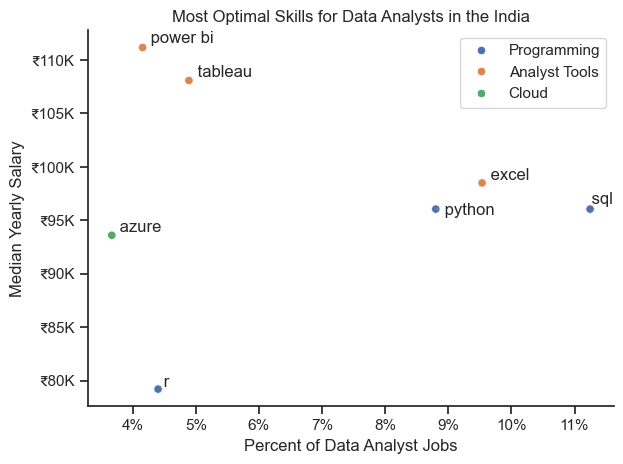

In [94]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

texts =[]

for i, txt in enumerate(df_DA_india_high_demand_skill.index):
    texts.append(plt.text(df_DA_india_high_demand_skill['skill_percent'].iloc[i], df_DA_india_high_demand_skill['median_salary'].iloc[i], " " + txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
sns.despine()
sns.set_theme(style='ticks')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the India')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'₹{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

handles,labels = plt.gca().get_legend_handles_labels()
camel_case_labels = [label.title().replace("_", " ") for label in labels]

# Set new legend labels
plt.legend(handles, camel_case_labels)

plt.tight_layout()
plt.show()

